In [2]:
import os
import cv2
import logging
import numpy as np
import pandas as pd

from ultralytics import YOLO

from matplotlib.pylab import plt
%matplotlib inline

In [3]:
model_namespace = {"spad": "Solar Panel Array Detector"}
model_description = {"spad": "Detect Solar Panel Arrays in Aerial Images"}

# --------------------------------- Paths --------------------------------
path_to_data = r"C:\Users\majmo\projects\ikiu"
path_to_models = r"..\models"

list_of_models = os.listdir(path_to_models)
list_of_models_namespace = [x if x not in model_namespace else model_namespace[x] for x in list_of_models]

In [4]:
list_of_models

['spad']

In [5]:
list_of_models_namespace

['Solar Panel Array Detector']

In [6]:
def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret,width = 800)
    IPython.display.display(i)

def load_yolov8_model(path_to_model: str, model_name:str, model_version:str, task: str):

    try:
        # Load Yolo Custom Model
        print(f"Loading Yolo {model_name}...")
        full_path_to_model = os.path.join(path_to_model, model_name, model_version, 'best.pt')
        # init yolov5 model
        model = YOLO(full_path_to_model, task)

        # model = torch.hub.load(path_to_yolo, 'custom', path=full_path_to_model, source="local", force_reload=True, _verbose=False)     
        print(f"Yolo {model_name} loaded!")
        return model
    except Exception as e:
        print(f"Exception at Yolo {e}")

In [7]:
model = load_yolov8_model(path_to_models, "spad", "v1.0.0", "segment")

Loading Yolo spad...
Yolo spad loaded!


In [8]:
# from ndarray
im2 = cv2.imread(r"C:\Users\majmo\Downloads\Solar Panels\Aerial Solar Panels.v13i.yolov5pytorch\train\images\DJI_0753_MP4-3_jpg.rf.469b8ad8c1c04569c3727f6ac7075950.jpg")

In [9]:
results = model.predict(source= im2, conf = 0.5, device= "0")
results  = results[0]


0: 192x320 3 solar-panelss, 437.5ms
Speed: 5.0ms preprocess, 437.5ms inference, 15.0ms postprocess per image at shape (1, 3, 320, 320)


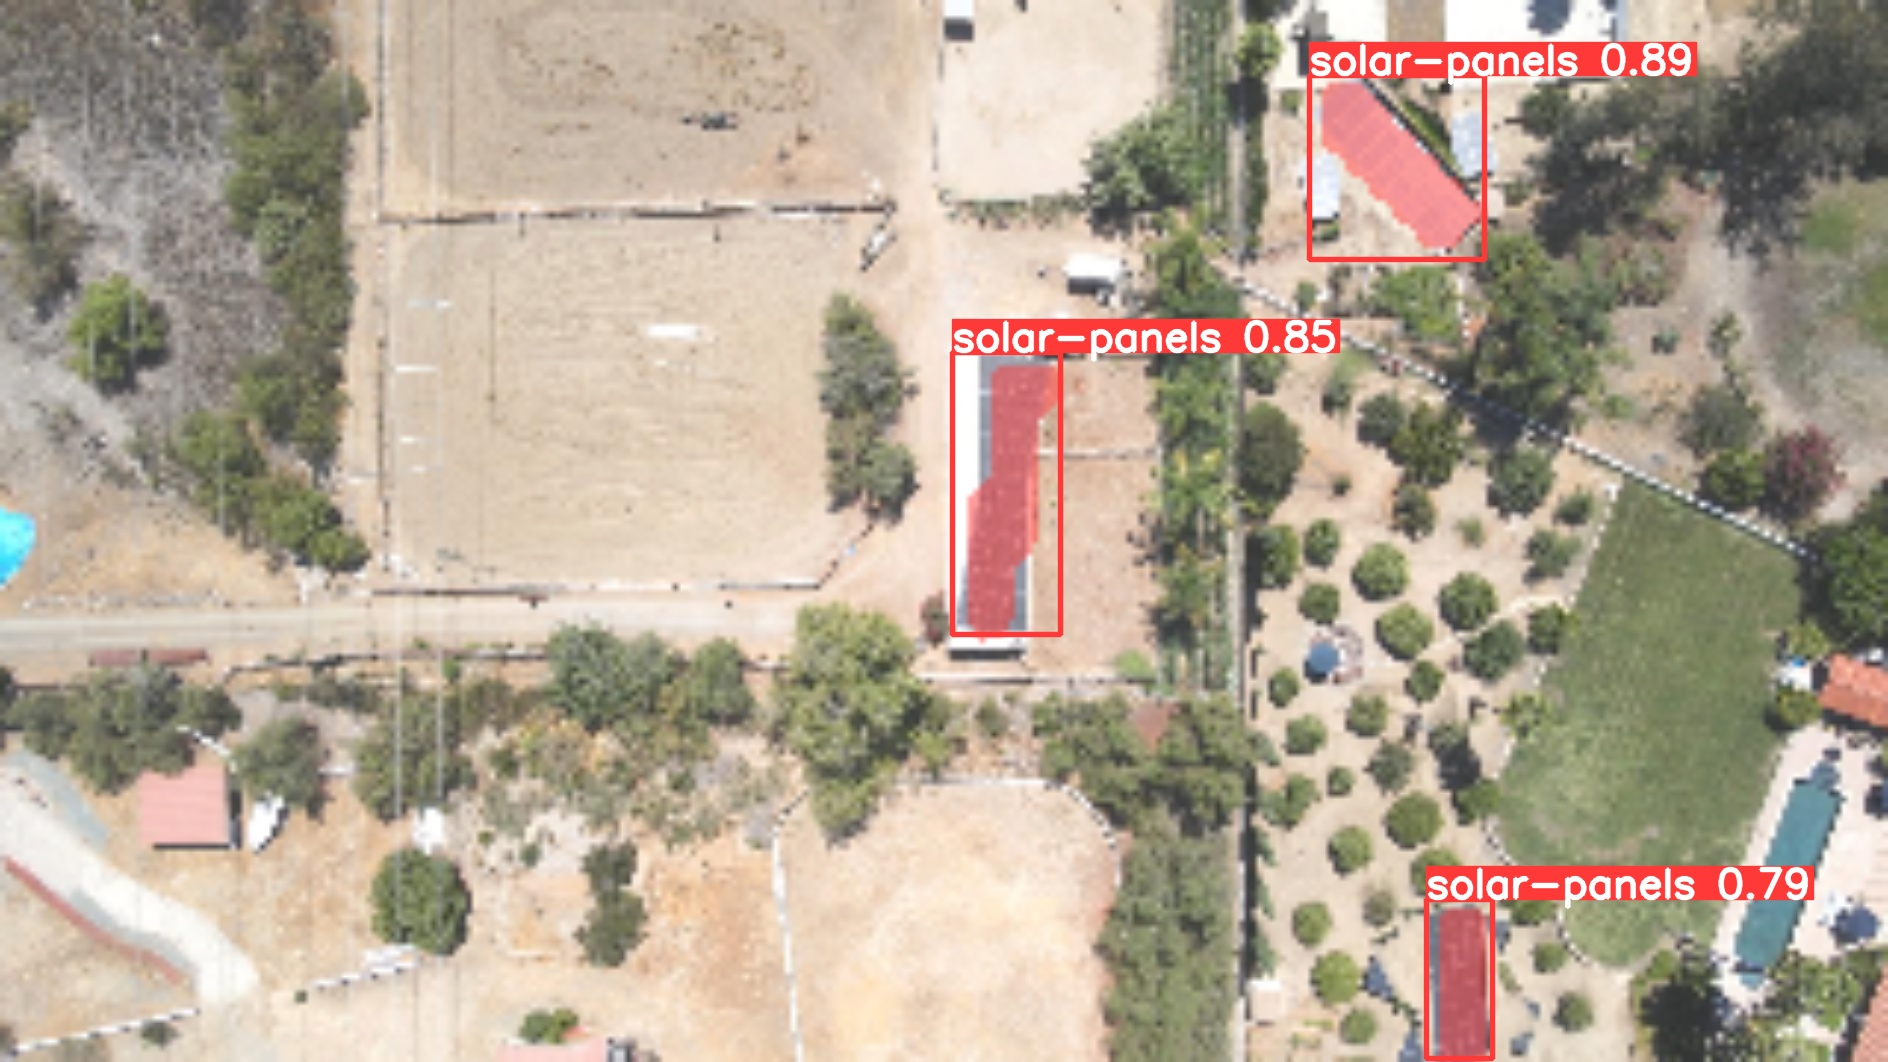

In [10]:
imshow(results.plot())

In [11]:
response = []

names = results.names
for result in results:
    boxes_unravelled = [value for value in result.boxes.xyxy[0].detach().cpu().numpy()] # Boxes object for bbox outputs
    cls_id = int(result.boxes.cls[0])
    cls_name = names[int(result.boxes.cls[0])]
    conf   = result.boxes.conf[0].item()    # Boxes object for bbox outputs
    
    boxes_unravelled = boxes_unravelled + [conf, cls_id, cls_name]

    response.append(boxes_unravelled)

response_df = pd.DataFrame(response, columns=['xmin', 'ymin', 'xmax', 'ymax', 'confidence', 'class', 'name'])

In [12]:
print(response_df)

          xmin        ymin         xmax         ymax  confidence  class  \
0  1309.685303   75.599426  1484.494995   259.671387    0.891347      0   
1   952.598999  352.238129  1060.904419   634.377808    0.850658      0   
2  1426.014404  899.255432  1492.666382  1058.858398    0.793120      0   

           name  
0  solar-panels  
1  solar-panels  
2  solar-panels  


In [1]:
#mask
#(result.masks.data[0].cpu().numpy() * 255).astype("uint8")